In [1]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
figsize(11, 9)

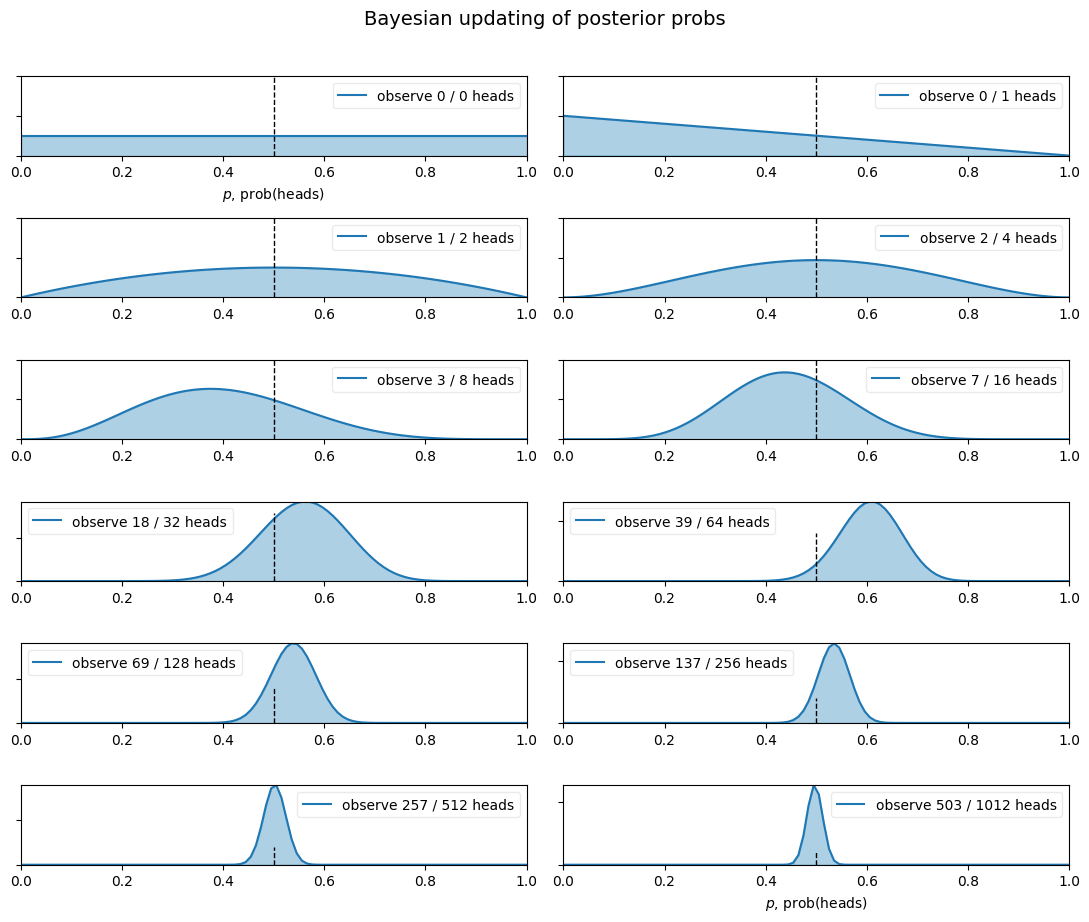

In [10]:
dist = stats.beta
n_trials = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1012]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# Bernoulli conj. prior
for i, n in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) // 2, 2, i + 1)
    plt.xlabel(
        '$p$, prob(heads)' if i in (0, len(n_trials) - 1) else None)
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:n].sum()
    y = dist.pdf(x, 1 + heads, 1 + n - heads)
    plt.plot(x, y, label=f'observe {heads} / {n} heads')
    plt.fill_between(x, 0, y, color='#348ABD', alpha=0.4)
    plt.vlines(0.5, 0, 4, color='k', linestyles='--', lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
plt.suptitle(
    'Bayesian updating of posterior probs', y=1.02, fontsize=14)
plt.tight_layout()